In [15]:
#Load Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
#Load the dataset

yellow_taxi_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")
yellow_taxi_df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [3]:
#Shape of Data
print(yellow_taxi_df.shape)

(10000, 18)


#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [4]:
#Summary statistics

print(yellow_taxi_df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe())

        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 4

Count the number of NAs in each column.

In [5]:
#Counting nulls - No nulls/na's

print(yellow_taxi_df.isna().sum())

print(yellow_taxi_df.isnull().sum())

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64
vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


array([[<Axes: xlabel='passenger_count', ylabel='passenger_count'>,
        <Axes: xlabel='trip_distance', ylabel='passenger_count'>,
        <Axes: xlabel='payment_type', ylabel='passenger_count'>,
        <Axes: xlabel='fare_amount', ylabel='passenger_count'>,
        <Axes: xlabel='extra', ylabel='passenger_count'>,
        <Axes: xlabel='mta_tax', ylabel='passenger_count'>,
        <Axes: xlabel='tip_amount', ylabel='passenger_count'>,
        <Axes: xlabel='tolls_amount', ylabel='passenger_count'>,
        <Axes: xlabel='improvement_surcharge', ylabel='passenger_count'>,
        <Axes: xlabel='total_amount', ylabel='passenger_count'>,
        <Axes: xlabel='congestion_surcharge', ylabel='passenger_count'>],
       [<Axes: xlabel='passenger_count', ylabel='trip_distance'>,
        <Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='payment_type', ylabel='trip_distance'>,
        <Axes: xlabel='fare_amount', ylabel='trip_distance'>,
        <Axes: xlabel='

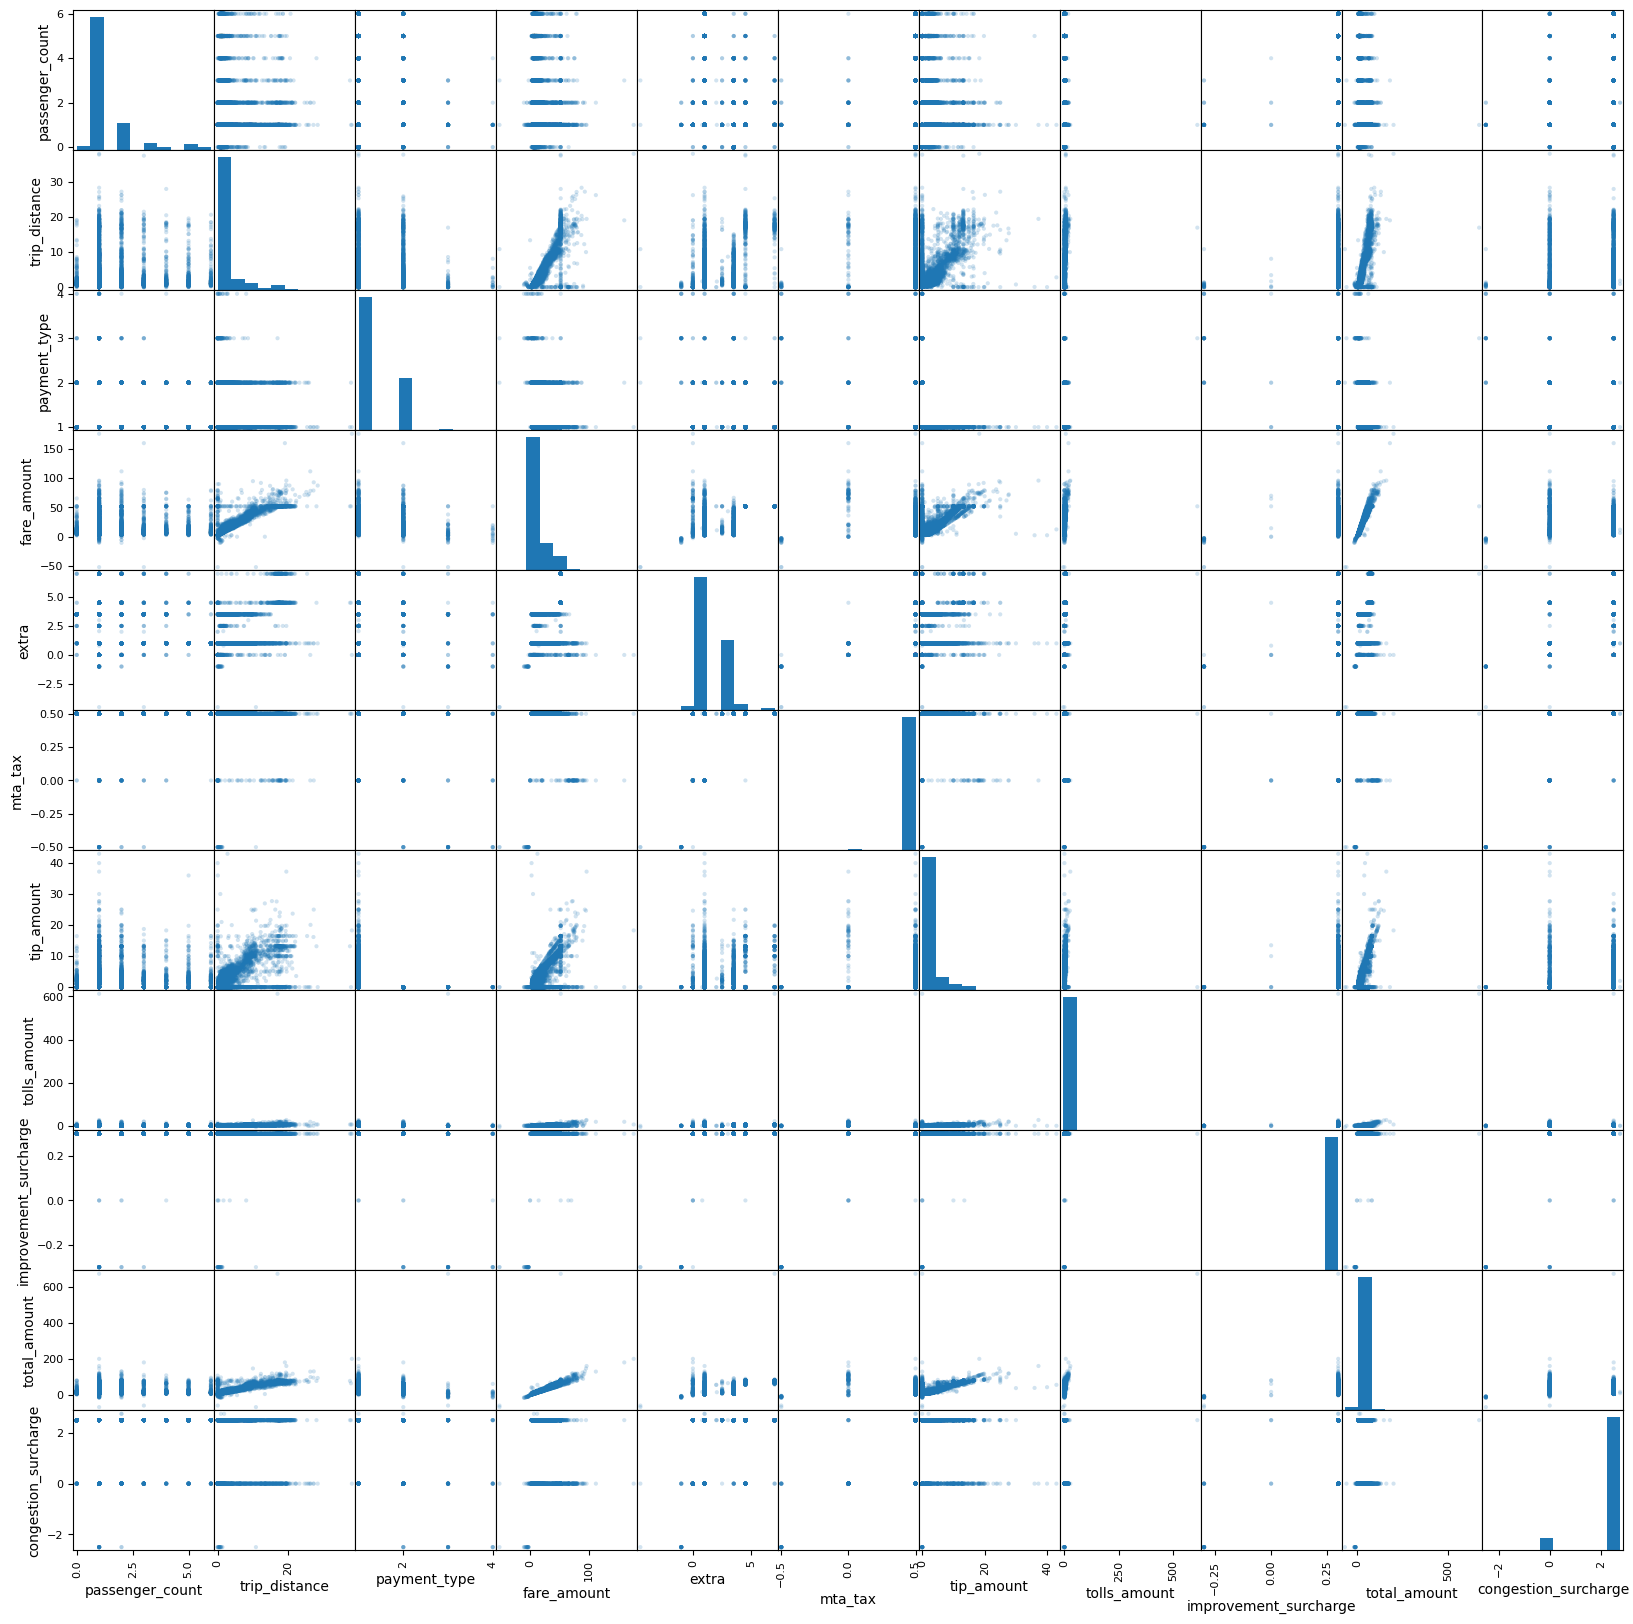

In [6]:
#Check dtypes

required_continuous_columns = [cols for cols in yellow_taxi_df.columns if (yellow_taxi_df[cols].dtype != 'object')]
required_continuous_columns = [cols for cols in required_continuous_columns if ('id' not in cols)]
print(required_continuous_columns)


# Plot scatterplot matrix

pd.plotting.scatter_matrix(yellow_taxi_df[required_continuous_columns], alpha=0.2,figsize=(20,20))



#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

Data points outside the IQR range (1246, 18)


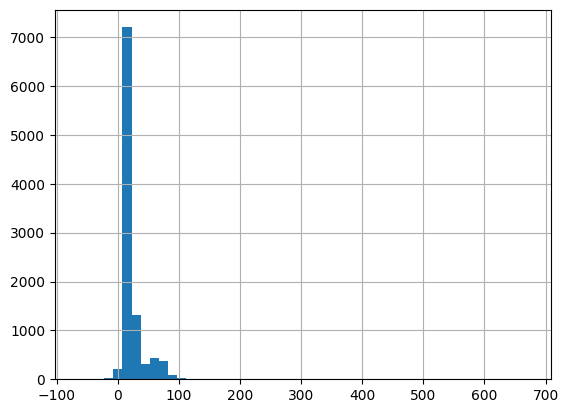

In [7]:
# check total amount histogram 

yellow_taxi_df['total_amount'].hist(bins=50)


#Conclusion - There are a few outliers - Data points can be seen on the extreme right of the distibution 


#Method 2:

# calculate IQR for column Height
Q1 = yellow_taxi_df['total_amount'].quantile(0.25)
Q3 = yellow_taxi_df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = yellow_taxi_df[(yellow_taxi_df['total_amount'] < Q1 - threshold * IQR) | (yellow_taxi_df['total_amount'] > Q3 + threshold * IQR)]

print("Data points outside the IQR range",outliers.shape)


# 1246 outliers

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

In [8]:


"""
   NOTE-->  to discuss in class - the target variable is continuous - wouldn't it make more sense to use linear regression instead of logistic - which is usually used for binary/categorical target variables.
"""

x_cols = [col for col in required_continuous_columns if col not in ['fare_amount','total_amount','tip_amount']]
y_cols = ['fare_amount']

X = yellow_taxi_df[x_cols]
y = yellow_taxi_df[y_cols]


#Create train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape,X_test.shape)

# Create a logistic regression model
model_lr = LinearRegression()

#Fit model
model_lr.fit(X_train, y_train)

#Predict 
y_pred = model_lr.predict(X_test)

"""

    Study coefficients - NOTE--> Sklean does not give p values - for significance - need to use an alternative library such as statsmodels to study p value of coefficients.

    mta_tax, improvement_surcharge drive the most change in fare amount.

"""

print(" Intercept = ", model_lr.intercept_)
display(pd.DataFrame({'column':X_test.columns,'coefficient / Impact of feature on fare_amount':model_lr.coef_[0]}))



# Accuracy Statistics - Model is innacurate - further steps such as outlier treatment etc. need to be performed to improve accuracy
mape_lr = mean_absolute_percentage_error(y_test,y_pred)
mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print("mape : ",mape_lr, " , mse : ",mse_lr , " rmse : ",rmse_lr)

X_test['orignal']= y_test
X_test['predictions'] = y_pred
X_test['percentage_error'] = (X_test['orignal']-X_test['predictions'])*100/X_test['orignal']


display(X_test.sort_values(by = 'percentage_error',ascending=True))











(6700, 8) (3300, 8)
 Intercept =  [1.6112837]


,column,coefficient / Impact of feature on fare_amount
0,passenger_count,0.005365
1,trip_distance,2.496275
2,payment_type,-0.685578
3,extra,-0.021882
4,mta_tax,-30.193724
5,tolls_amount,1.078454
6,improvement_surcharge,80.677519
7,congestion_surcharge,-1.271011


mape :  105071800458430.61  , mse :  169.80208210353317  rmse :  13.030812795199429


,passenger_count,trip_distance,payment_type,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,orignal,predictions,percentage_error
9233,1,5.50,4,0.0,0.0,0.0,0.3,0.0,0.00,36.807106,-inf
6749,2,3.43,2,0.0,0.0,0.0,0.0,0.0,0.00,8.813081,-inf
5135,1,0.30,1,0.0,0.0,0.0,0.0,0.0,0.00,1.679953,-inf
7013,1,2.10,2,0.0,0.0,0.0,0.3,0.0,0.00,29.690926,-inf
6329,1,0.50,2,0.0,0.0,0.0,0.3,0.0,0.01,25.696887,-2.568689e+05
...,...,...,...,...,...,...,...,...,...,...,...
7739,4,0.00,1,0.0,0.5,0.0,0.3,0.0,75.12,10.053559,8.661667e+01
8674,2,0.00,1,0.0,0.5,0.0,0.3,0.0,78.00,10.042830,8.712458e+01
8736,1,0.00,2,4.5,0.5,0.0,0.3,2.5,52.00,6.075888,8.831560e+01
7156,5,0.06,1,0.0,0.5,0.0,0.3,2.5,63.50,7.031172,8.892729e+01


#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


(6700, 8) (3300, 8)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
[0.00130133 0.90149316 0.00556198 0.05539204 0.01022026 0.02160194
 0.00168202 0.00274727]
mape :  134739486034851.6  , mse :  169.80208210353317  rmse :  13.030812795199429


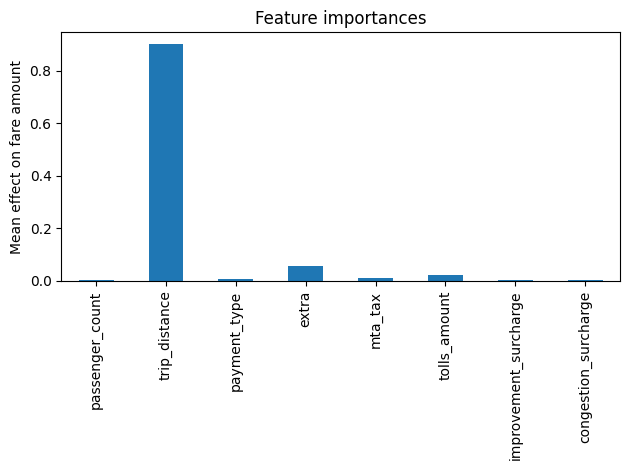

In [20]:
# Use Random Forest Regressor



#Create train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape,X_test.shape)

# Run random forest regressor with Default Params
model_rf = RandomForestRegressor(max_depth=5, random_state=0)
model_rf.fit(X_train, y_train)

#Predict 
y_pred = model_rf.predict(X_test)


print(model_rf.get_params(deep=True))

#Accuracy Statistics
mape_rf = mean_absolute_percentage_error(y_test,y_pred)
mse_rf = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse_rf = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print("mape : ",mape_rf, " , mse : ",mse_lr , " rmse : ",rmse_lr)

#Get Feature Importance
forest_importances = pd.Series(model_rf.feature_importances_, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean effect on fare amount")
fig.tight_layout()


"""
In this case - Linear regression is more accurate than decision tree. However, more often than not - decision trees are more accurate than regular linear regression models.
Linear regression, however, is more explainable - as coefficients are highly interpretable. Decision trees such as random forest are interpretable up to a point - by studying feature importance - but the direct impact on y is not as interpretable.
This is because they use gini impurity/ entropy to form its trees - and these can be misleading to interpret due to factors such as high cardinality.

Decision trees, however, in most cases, are more accurate with non-linear data as compared to regular linear regression.

"""